## 1. Anatomy of a Neural Network:

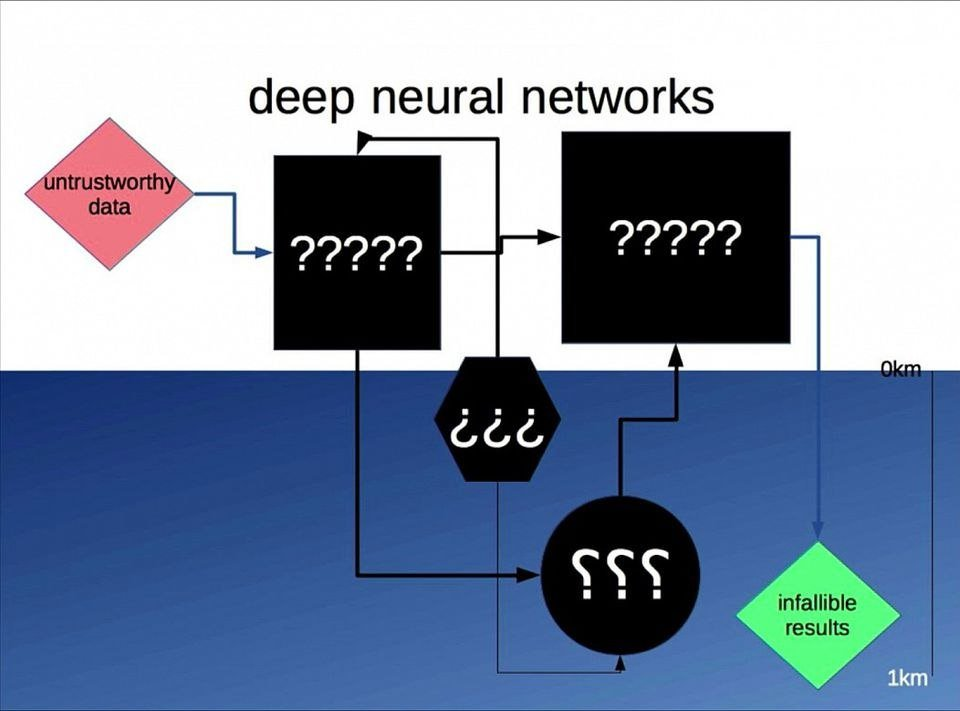

### Tensors

Tensors are a generalization of matrices to an arbitrary number of dimensions.
A tensor is a container for data—almost always numerical data.

-  Scalars are 0D tensors and have 0 axes.
-  Vectors are 1D tensors and have 1 axis. 
-  Matrices are 2D tensors with two axes (example: vector data)
-  3D tensors- timeseries data or sequence data are 3D tensors of shape (samples, timesteps, features)
-  4D tensors- Images would be 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
-  5D tensors- Video data of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)


![title](Figure1.jpeg)

Training a neural network would revolve around the following objects:
- __Layers__, which are combined into a network (or model)
- __The input data__ and corresponding targets
- __The loss function__, which defines the feedback signal used for learning
- __The optimizer__, which determines how learning proceeds

### Layers: 
A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors.

Different layers are appropriate for different tensor formats and different types of data processing. 
Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers (also called fully connected or dense layers). 
Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers such as an LSTM layer.
Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D in Keras).

### Loss functions:
The quantity that will be minimized during training. It represents a measure of success for the task at hand.

In our example, we will be using the binary crossentropy loss, since we're dealing with a model that outputs probabilities. 

### Optimizer: 
Determines how the network will be updated based on the loss function.
It implements a specific variant of stochastic gradient descent (SGD).
A neural network that has multiple outputs may have multiple loss functions (one per output)

## 2. Classifying movie reviews: A Binary Classification example

In [72]:
import keras

In [73]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000) 
# only keep the top 10,000 most frequently occurring words in the training data, in order to work with data of mangaeable size

In [74]:
train_data[9]

[1,
 14,
 20,
 47,
 111,
 439,
 3445,
 19,
 12,
 15,
 166,
 12,
 216,
 125,
 40,
 6,
 364,
 352,
 707,
 1187,
 39,
 294,
 11,
 22,
 396,
 13,
 28,
 8,
 202,
 12,
 1109,
 23,
 94,
 2,
 151,
 111,
 211,
 469,
 4,
 20,
 13,
 258,
 546,
 1104,
 7273,
 12,
 16,
 38,
 78,
 33,
 211,
 15,
 12,
 16,
 2849,
 63,
 93,
 12,
 6,
 253,
 106,
 10,
 10,
 48,
 335,
 267,
 18,
 6,
 364,
 1242,
 1179,
 20,
 19,
 6,
 1009,
 7,
 1987,
 189,
 5,
 6,
 8419,
 7,
 2723,
 2,
 95,
 1719,
 6,
 6035,
 7,
 3912,
 7144,
 49,
 369,
 120,
 5,
 28,
 49,
 253,
 10,
 10,
 13,
 1041,
 19,
 85,
 795,
 15,
 4,
 481,
 9,
 55,
 78,
 807,
 9,
 375,
 8,
 1167,
 8,
 794,
 76,
 7,
 4,
 58,
 5,
 4,
 816,
 9,
 243,
 7,
 43,
 50]

In [21]:
test_labels[23000]

0

In [23]:
# since we're restricting ourself to the top 10,000 most frequent words, no word index should exceed 10,000
max([max(sequence)for sequence in train_data])

9999

In [25]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value, key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 3s 2us/step


In [26]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [33]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension)) # creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i,sequence]= 1. # Sets specific indices of results[i] to 1s
    return results

x_train= vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data) # vectorized test data


In [34]:
x_train[998]

array([0., 1., 1., ..., 0., 0., 0.])

In [35]:
# vectorizing our labels
y_train= np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [36]:
from keras import models
from keras import layers

In [37]:
model=models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [39]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [40]:
# setting apart 10,000 samples from the original training data to make a validation set
x_val = x_train[:10000]
partial_x_train= x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [41]:

history= model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))
''' returns a History object. This object has a member history, which is a dictionary containing data about 
everything that happened during training.
'''

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 121s 8ms/step - loss: 0.5084 - acc: 0.7812 - val_loss: 0.3798 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 10s 639us/step - loss: 0.3005 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 7s 466us/step - loss: 0.2180 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 6s 433us/step - loss: 0.1751 - acc: 0.9436 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 6s 396us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 6s 423us/step - loss: 0.1150 - acc: 0.9652 - val_loss: 0.3147 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 6s 399us/step - loss: 0.0979 - acc: 0.9705 - val_loss: 0.3127 -

In [42]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

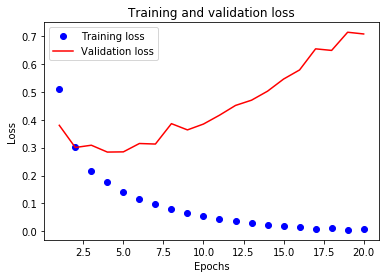

In [46]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

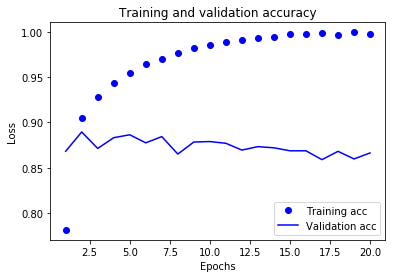

In [49]:


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The training loss decreases with every epoch, and the training accuracy increases with every epoch.

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 108s 4ms/step - loss: 0.4708 - acc: 0.8228
Epoch 2/4
25000/25000 [==============================] - 7s 276us/step - loss: 0.2689 - acc: 0.9081
Epoch 3/4
25000/25000 [==============================] - 6s 259us/step - loss: 0.2082 - acc: 0.9263
Epoch 4/4
25000/25000 [==============================] - 129s 5ms/step


In [59]:
results

[0.28735693694114683, 0.88596]

In [53]:
# to generate predictons on our test data
model.predict(x_test)

array([[0.16965508],
       [0.99941957],
       [0.71872014],
       ...,
       [0.08666617],
       [0.05291471],
       [0.42695776]], dtype=float32)

The network is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4)

## Further Experiments:

### 1. Changing the number of input layers:

In [70]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 168s 7ms/step - loss: 0.4871 - acc: 0.8046
Epoch 2/4
25000/25000 [==============================] - 11s 456us/step - loss: 0.2632 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 8s 310us/step - loss: 0.1988 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 123s 5ms/step


In [71]:
results

[0.30737871017456053, 0.881]

### 2. Changing the number of hidden units:

In [60]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 96s 4ms/step - loss: 0.6075 - acc: 0.6616
Epoch 2/4
25000/25000 [==============================] - 7s 281us/step - loss: 0.4730 - acc: 0.8644
Epoch 3/4
25000/25000 [==============================] - 7s 287us/step - loss: 0.3971 - acc: 0.9109
Epoch 4/4
25000/25000 [==============================] - 136s 5ms/step


In [61]:
results

[0.4005514805984497, 0.86816]

In [62]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 119s 5ms/step - loss: 0.4406 - acc: 0.8122
Epoch 2/4
25000/25000 [==============================] - 7s 295us/step - loss: 0.2457 - acc: 0.9082
Epoch 3/4
25000/25000 [==============================] - 7s 291us/step - loss: 0.1871 - acc: 0.9318
Epoch 4/4
25000/25000 [==============================] - 68s 3ms/step


In [63]:
results

[0.358613595328331, 0.86868]

### 3. Changing loss functions:

In [65]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 133s 5ms/step - loss: 0.1442 - acc: 0.8109
Epoch 2/4
25000/25000 [==============================] - 10s 402us/step - loss: 0.0725 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 8s 308us/step - loss: 0.0556 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 289s 12ms/step


In [66]:
results

[0.12855201555609702, 0.8322]

### 4. Changing Activation function:

In [67]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 102s 4ms/step - loss: 0.3934 - acc: 0.8200
Epoch 2/4
25000/25000 [==============================] - 8s 325us/step - loss: 0.2216 - acc: 0.9146
Epoch 3/4
25000/25000 [==============================] - 7s 288us/step - loss: 0.1742 - acc: 0.9339
Epoch 4/4
25000/25000 [==============================] - 124s 5ms/step


In [68]:
results

[0.367987937438488, 0.86144]

# In conclusion,

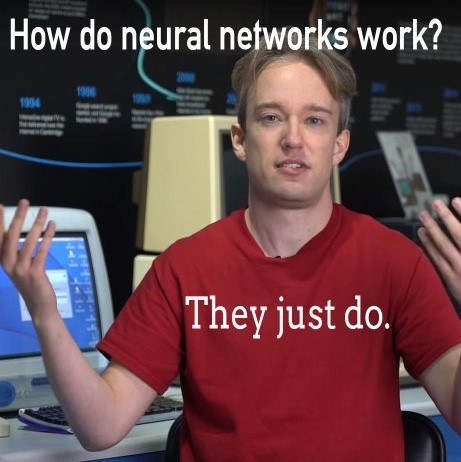